# Représenter un signal périodique et illustrer l’influence de ses caractéristiques (période, amplitude) sur sa représentation.

Amplitude en un point donné au cours du temps :
y(t) = A * cos ( 2*Pi * t / T ) 

Amplitude à un instant donné en fonction de la position :
y(x) = A * cos ( 2*Pi * x / lambda )

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
Pi = np.pi

### Signal en un point au cours du temps
Modifier l'amplitude A ou la période T pour observer l'influence sur la représentation du signal.

Text(0.5,1,'Amplitude en un point du milieu au cours du temps')

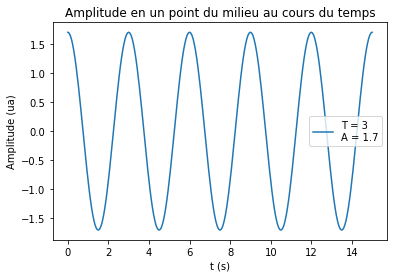

In [3]:
A = 1.7 # amplitude en unité arbitraire (ua)
T = 3 # période en s

# création des instants
t = np.linspace(0, 5*T, 256) # 256 instants répartis de t=0 à t=5T

# calcul de l'amplitude 
y = A*np.cos(2*Pi*t/T)

# graphique
plt.plot(t, y, label=f'T = {T}\nA = {A}')
plt.legend()
plt.ylabel('Amplitude (ua)')
plt.xlabel('t (s)')
plt.title('Amplitude en un point du milieu au cours du temps')

### Utilisation de widgets de contrôles (plus compliqué !)

In [4]:
# librairie complémentaire pour les widgets
import matplotlib.widgets as mpw 

<IPython.core.display.Javascript object>


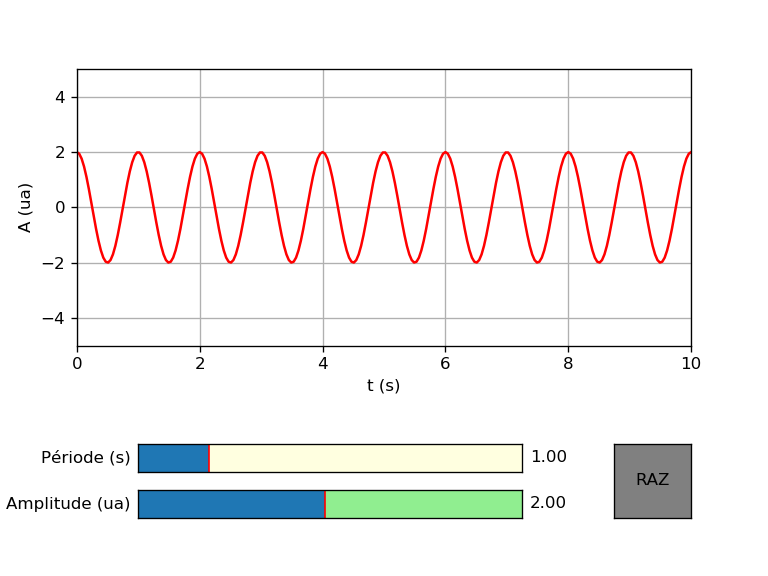

In [6]:
# backend permettant l'interactivité
%matplotlib notebook

fig, ax = plt.subplots()
plt.xlabel('t (s)')
plt.ylabel('A (ua)')
plt.grid()
plt.subplots_adjust(left=0.1, bottom=0.4) # positionnement de la zone graphique pour laisser de l'espace aux widgets

T = 1 # période en s
tmax = 10 # graphique sur 10 s max
t = np.linspace(0, tmax, 256)
A = 2 # amplitude en ua
y = A*np.cos(2*Pi*t/T)

courbe, = plt.plot(t, y, color='red') # conserve la référence de la courbe (Artist)
plt.axis(xmin=0, xmax=10, ymin=-5, ymax=5) # plages des abscisses et ordonnées

# définition des 'axes' pour contenir les widgets
ax_A = plt.axes([0.18, 0.1, 0.5, 0.05], facecolor='lightgreen')
ax_T = plt.axes([0.18, 0.18, 0.5, 0.05], facecolor='lightyellow')

# création des widgets
slider_T = mpw.Slider(ax_T, 'Période (s)', 0.1, 5, valinit=T)
slider_A = mpw.Slider(ax_A, 'Amplitude (ua)', 0.1, 4, valinit=A)

def maj(val):
    A = slider_A.val
    T = slider_T.val
    courbe.set_ydata(A*np.cos(2*Pi*t/T)) # maj des données de la courbe
    fig.canvas.draw_idle() # maj du tracé de la courbe

# action à effectuer lors de l'utilisation des widgets    
slider_T.on_changed(maj)
slider_A.on_changed(maj)

# on ajoute un bouton de Remise à zéro (RAZ) des paramètres
ax_RAZ = plt.axes([0.8, 0.1, 0.1, 0.13])
button_RAZ = mpw.Button(ax_RAZ, 'RAZ', color='gray', hovercolor='0.777')

def raz(event):
    slider_A.reset()
    slider_T.reset()
    
button_RAZ.on_clicked(raz)

plt.show()

### Signal en fonction de la position à un instant donné

Text(0.5,1,'Amplitude à un instant donné')

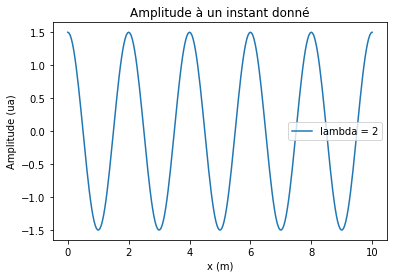

In [7]:
%matplotlib inline
A = 1.5 # amplitude en unité arbitraire (ua)
lambda_ = 2 # longueur d'onde en m

# création des positions
x = np.linspace(0, 5*lambda_, 256) # 256 positions réparties de x=0 à x=5 lambda

# calcul de l'amplitude 
y = A*np.cos(2*Pi*x/lambda_)

# graphique
plt.plot(x, y, label=f'lambda = {lambda_}')
plt.legend()
plt.ylabel('Amplitude (ua)')
plt.xlabel('x (m)')
plt.title('Amplitude à un instant donné')